## Created on Thu Sep $6^{th}$ 2020 

### @author: Maximilian Forstenhaeusler

# AFM - Contact Mode Simulation Example using the afmsim library

### Description 
This is an example of how the library afmsim can be implemented to simulate an AFM contact mode experiment. The example illustrates the impact of different characteristic times, $\tau_1$, and different cantilever stiffnesses, $k$, on the respective F-d curves and, therefore, the indentation into an arbitrary viscoelastic sample. 

### Call Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import pandas as pd
from matplotlib import cm
from afmsim import contact_mode, differential_constants, contact_mode
from viscoelasticity import conv
from numba import jit

### Setup Input Parameters

#### Cantilever and Tip Parameters

In [2]:
vb = 50e-9  # velocity of approaching sample
zb = 3e-9  # initial position of cantilever
Q1 = 100  # Quality Factor
k_m1_l = [0.5, 1, 2]   # equilibrium cantilever stiffness
fo1 = 10e3  # natural frequency
period1 = 1.0 / fo1  # fundamental period
R = 20e-9  # radius tip
nu = 0.5  # poissons ratio of material

#### Molecular Interaction Forces - Constants

*Note: Hammaker constant, $H$, and intermolecular distance, $a$, are initialzed in the function directly 

In [3]:
vdw = 2  # van der Waals constant

#### Simulation Time 

In [4]:
start = 0  # defines start of the simulation
landingtime = zb / vb
final_time = 2  # indentation time
stop = landingtime + final_time  # defines end of the simulation
timestep =  period1 / 1.0e3
printstep = period1 / 10  # printstep of Force distance curve

time = np.arange(start, stop, timestep) # time array 

#### Viscoelastic Model Parameter

In [5]:
arms = [3, 5]
Jg = 2.0e-10  # Glassy compliance
J_3 = np.zeros(arms[0])  # compliance array - 3 arm
tau_3 = np.zeros(arms[0])  # characteristic time array - 3 arm
J_5 = np.zeros(arms[1])  # compliance array - 5 arm
tau_5 = np.zeros(arms[1])  # characteristic time array - 5 arm

J_3[0], tau_3[0] = 5.0e-9, 1.5e-1
J_3[1], tau_3[1] = 7.0e-9, 0.5e-3
J_3[2], tau_3[2] = 1.0e-10, 0.5e-2

J_5[0], tau_5[0] = 5.0e-9, 0.5e-4
J_5[1], tau_5[1] = 7.0e-9, 0.5e-3
J_5[2], tau_5[2] = 1.0e-10, 0.5e-2
J_5[3], tau_5[3] = 3.0e-6, 0.5e-1
J_5[4], tau_5[4] = 4.0e-6, 0.5e-0

_____________________________________________________________________________________________________________________________

### Simulation 

#### Calculation of the differential constants used for tip-sample force calculation*

*Forstenhaeusler M., López-Guerra, E.A., Solares, S.D, "Guidelines to Simulate Linear Viscoelastic Materials with an Arbitrary Number of Characteristic Times in the context of Atomic Force Microscopy", Section 2.4
<br><br>

Through the calculation of the differential constants, the model, used for the simulation, is initialized. In this case, we use a 3-Arm Generalized Kelvin-Voigt Model. 

In [6]:
u_3, q_3 = differential_constants('Gen. Kelvin-Voigt', Jg, J_3, tau_3)  # 3 Arm
u_5, q_5 = differential_constants('Gen. Kelvin-Voigt', Jg, J_5, tau_5)  # 5 Arm

### AFM - Contact Mode Simulation 

#### $1^{st}$ Simulate Contact Mode with Different Cantilever Stiffnesses, $k_m1$

In [7]:
AFM_jit = jit()(contact_mode)  # calls AFM simul function and initializes numba procedure to increase iter. speed

# initialze solution arrays for 3-Arm Model Gen.
Fts_3 = []
tip_3 = []
base_3 = []

for i in range(len(k_m1_l)):
    print('k_m1=', k_m1_l[i])
    print(' - - - 3 Arm - dt: %s: - - - ' %timestep)
    t0 = tm.time()
    Fts, tip, base = AFM_jit('Approach-Retract', time, timestep, zb, vb, u_3, q_3, k_m1_l[i], fo1, Q1, vdw, R, nu)
    t1 = tm.time()
    Fts_3.append(Fts)
    tip_3.append(tip)
    base_3.append(base)
    print(' - - - - - - - - - - - - - - - - - - - - - - - -')
    print('Total simulation time: %2.3f s' % (t1 - t0))
    print('\n')

k_m1= 0.5
 - - - 3 Arm - dt: 1.0000000000000001e-07: - - - 
Number of Iterations: 20.6 Mio
Iteration: 0.0 Mio
Iteration: 1.0 Mio
Iteration: 2.0 Mio
Iteration: 3.0 Mio
Iteration: 4.0 Mio
Iteration: 5.0 Mio
Iteration: 6.0 Mio
Iteration: 7.0 Mio
Iteration: 8.0 Mio
Iteration: 9.0 Mio
Iteration: 10.0 Mio
Iteration: 11.0 Mio
Iteration: 12.0 Mio
Iteration: 13.0 Mio
Iteration: 14.0 Mio
Iteration: 15.0 Mio
Iteration: 16.0 Mio
Iteration: 17.0 Mio
Iteration: 18.0 Mio
Iteration: 19.0 Mio
Iteration: 20.0 Mio
 - - - - - - - - - - - - - - - - - - - - - - - -
Total simulation time: 21.258 s


k_m1= 1
 - - - 3 Arm - dt: 1.0000000000000001e-07: - - - 
Number of Iterations: 20.6 Mio
Iteration: 0.0 Mio
Iteration: 1.0 Mio
Iteration: 2.0 Mio
Iteration: 3.0 Mio
Iteration: 4.0 Mio
Iteration: 5.0 Mio
Iteration: 6.0 Mio
Iteration: 7.0 Mio
Iteration: 8.0 Mio
Iteration: 9.0 Mio
Iteration: 10.0 Mio
Iteration: 11.0 Mio
Iteration: 12.0 Mio
Iteration: 13.0 Mio
Iteration: 14.0 Mio
Iteration: 15.0 Mio
Iteration: 16.0 M

### $2^{nd}$ Simulate Contact Mode with Different Charactersitic Times, $\tau_1$ 

#### Viscoelastic Model Parameter

In [8]:
k_m1 = 1
arms = [3, 5]
Jg = 2.0e-10  # Glassy compliance
J_1 = np.zeros(arms[0])  # compliance array - 3 arm
J_2 = np.zeros(arms[0])  # compliance array - 3 arm
J_3 = np.zeros(arms[0])  # compliance array - 3 arm
tau_1 = np.zeros(arms[0])  # characteristic time array - 3 arm
tau_2 = np.zeros(arms[0])  # characteristic time array - 3 arm
tau_3 = np.zeros(arms[0])  # characteristic time array - 3 arm


J_1[0], tau_1[0] = 9.0e-9, 0.2e-1
J_1[1], tau_1[1] = 7.0e-9, 0.5e-3
J_1[2], tau_1[2] = 1.0e-10, 0.5e-2

J_2[0], tau_2[0] = 9.0e-9, 1.5e-1
J_2[1], tau_2[1] = 7.0e-9, 0.5e-3
J_2[2], tau_2[2] = 1.0e-10, 0.5e-2

J_3[0], tau_3[0] = 9.0e-9, 4.5e-1
J_3[1], tau_3[1] = 7.0e-9, 0.5e-3
J_3[2], tau_3[2] = 1.0e-10, 0.5e-2

J = [J_1, J_2, J_3]
tau = [tau_1, tau_2, tau_3]

In [9]:
AFM_jit = jit()(contact_mode)  # calls AFM simul function and initializes numba procedure to increase iter. speed

# initialze solution arrays for 3-Arm Model Gen.
Fts_3_1 = []
tip_3_1 = []
base_3_1 = []

for i in range(3):
    u_3, q_3 = differential_constants('Gen. Kelvin-Voigt', Jg, J[i], tau[i])  # 3 Arm
    print('Parameter', i+1)
    print(' - - - 3 Arm - dt: %s: - - - ' %timestep)
    t0 = tm.time()
    Fts, tip, base = AFM_jit('Approach-Retract', time, timestep, zb, vb, u_3, q_3, k_m1, fo1, Q1, vdw, R, nu)
    t1 = tm.time()
    Fts_3_1.append(Fts)
    tip_3_1.append(tip)
    base_3_1.append(base)
    print(' - - - - - - - - - - - - - - - - - - - - - - - -')
    print('Total simulation time: %2.3f s' % (t1 - t0))
    print('\n')

Parameter 1
 - - - 3 Arm - dt: 1.0000000000000001e-07: - - - 
Number of Iterations: 20.6 Mio
Iteration: 0.0 Mio
Iteration: 1.0 Mio
Iteration: 2.0 Mio
Iteration: 3.0 Mio
Iteration: 4.0 Mio
Iteration: 5.0 Mio
Iteration: 6.0 Mio
Iteration: 7.0 Mio
Iteration: 8.0 Mio
Iteration: 9.0 Mio
Iteration: 10.0 Mio
Iteration: 11.0 Mio
Iteration: 12.0 Mio
Iteration: 13.0 Mio
Iteration: 14.0 Mio
Iteration: 15.0 Mio
Iteration: 16.0 Mio
Iteration: 17.0 Mio
Iteration: 18.0 Mio
Iteration: 19.0 Mio
Iteration: 20.0 Mio
 - - - - - - - - - - - - - - - - - - - - - - - -
Total simulation time: 21.760 s


Parameter 2
 - - - 3 Arm - dt: 1.0000000000000001e-07: - - - 
Number of Iterations: 20.6 Mio
Iteration: 0.0 Mio
Iteration: 1.0 Mio
Iteration: 2.0 Mio
Iteration: 3.0 Mio
Iteration: 4.0 Mio
Iteration: 5.0 Mio
Iteration: 6.0 Mio
Iteration: 7.0 Mio
Iteration: 8.0 Mio
Iteration: 9.0 Mio
Iteration: 10.0 Mio
Iteration: 11.0 Mio
Iteration: 12.0 Mio
Iteration: 13.0 Mio
Iteration: 14.0 Mio
Iteration: 15.0 Mio
Iteration: 

_____________________________________________________________________________________________________________________________

### Simulated Force-Distance Graphs

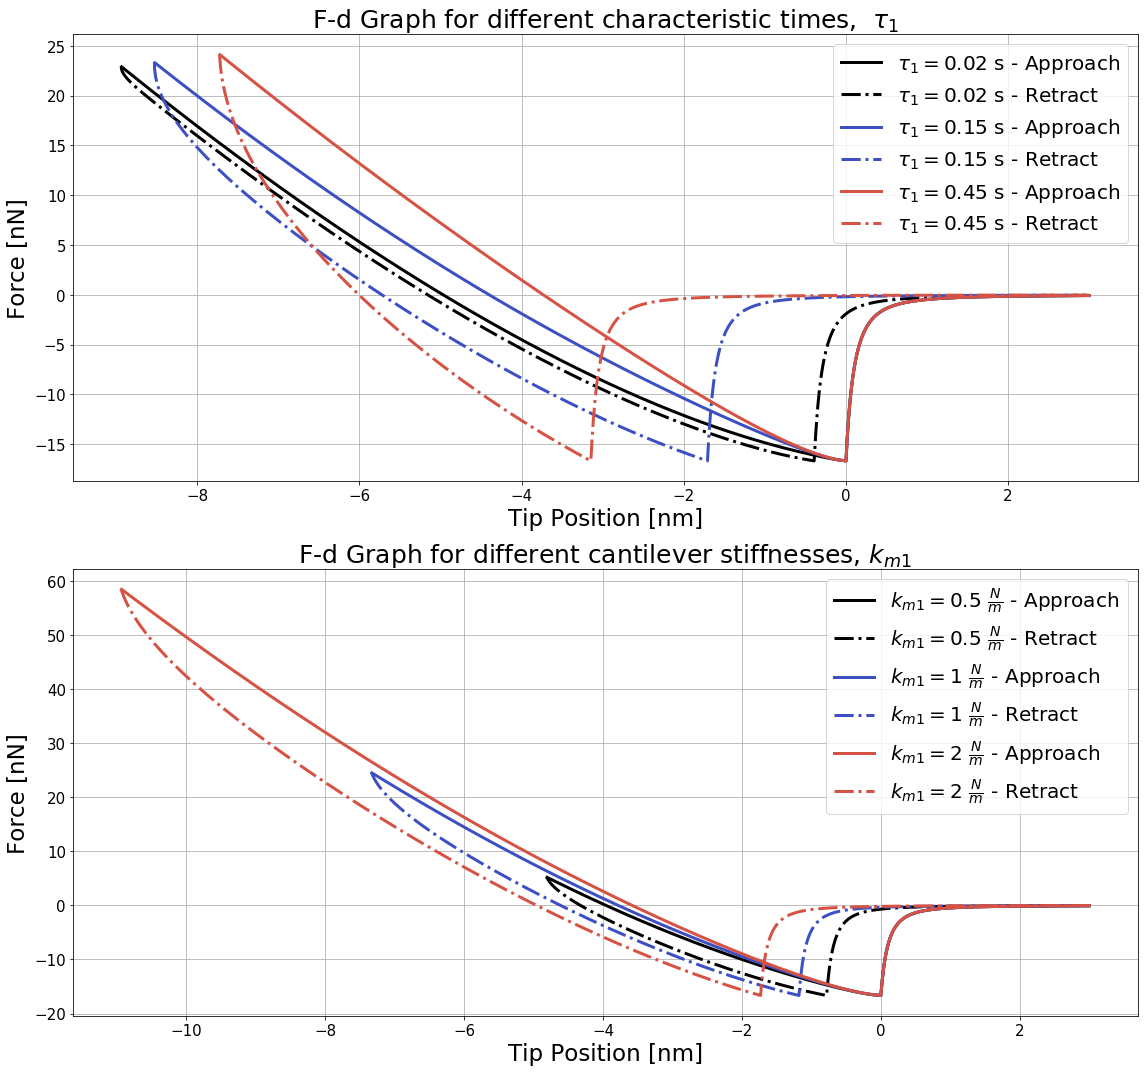

In [10]:
cmap = cm.coolwarm
colors = [cmap(0.01), cmap(0.2), cmap(0.9)]

fig, ax = plt.subplots(2, 1, figsize=(16, 15), tight_layout=True)

ax[0].set_title(r'F-d Graph for different characteristic times,  $\tau_1$', fontsize=25)
ax[0].plot(tip_3_1[0][:int(len(time)/2)][::int(1e3)]*1e9, Fts_3_1[0][:int(len(time)/2)][::int(1e3)]*1e9, '-', c='black', lw=3, label=r'$\tau_1 = %s $ s - Approach' %tau_1[0])
ax[0].plot(tip_3_1[0][int(len(time)/2):][::int(1e3)]*1e9, Fts_3_1[0][int(len(time)/2):][::int(1e3)]*1e9, '-.', c='black', lw=3, label=r'$\tau_1 = %s $ s - Retract' %tau_1[0])
ax[0].plot(tip_3_1[1][:int(len(time)/2)][::int(1e3)]*1e9, Fts_3_1[1][:int(len(time)/2)][::int(1e3)]*1e9, '-', c=colors[0], lw=3, label=r'$\tau_1 = %s $ s - Approach' %tau_2[0])
ax[0].plot(tip_3_1[1][int(len(time)/2):][::int(1e3)]*1e9, Fts_3_1[1][int(len(time)/2):][::int(1e3)]*1e9, '-.', c=colors[0], lw=3, label=r'$\tau_1 = %s $ s - Retract' %tau_2[0])
ax[0].plot(tip_3_1[2][:int(len(time)/2)][::int(1e3)]*1e9, Fts_3_1[2][:int(len(time)/2)][::int(1e3)]*1e9, '-', c=colors[2], lw=3, label=r'$\tau_1 = %s $ s - Approach' %tau_3[0])
ax[0].plot(tip_3_1[2][int(len(time)/2):][::int(1e3)]*1e9, Fts_3_1[2][int(len(time)/2):][::int(1e3)]*1e9, '-.', c=colors[2], lw=3, label=r'$\tau_1 = %s $ s - Retract' %tau_3[0])
ax[0].set_xlabel('Tip Position [nm]', fontsize=23)
ax[0].set_ylabel('Force [nN]', fontsize=23)
ax[0].grid()
ax[0].legend(fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=15)
ax[0].yaxis.set_tick_params(labelsize=15)

ax[1].set_title(r'F-d Graph for different cantilever stiffnesses, $k_{m1}$', fontsize=25)
ax[1].plot(tip_3[0][:int(len(time)/2)][::int(1e3)]*1e9, Fts_3[0][:int(len(time)/2)][::int(1e3)]*1e9, '-', c='black', lw=3, label=r'$k_{m1}=%s $ $\frac{N}{m}$ - Approach' %k_m1_l[0])
ax[1].plot(tip_3[0][int(len(time)/2):][::int(1e3)]*1e9, Fts_3[0][int(len(time)/2):][::int(1e3)]*1e9, '-.', c='black', lw=3, label=r'$k_{m1}=%s $ $\frac{N}{m}$ - Retract' %k_m1_l[0])
ax[1].plot(tip_3[1][:int(len(time)/2)][::int(1e3)]*1e9, Fts_3[1][:int(len(time)/2)][::int(1e3)]*1e9, '-', c=colors[0], lw=3, label=r'$k_{m1}= %d $ $\frac{N}{m}$ - Approach' %k_m1_l[1])
ax[1].plot(tip_3[1][int(len(time)/2):][::int(1e3)]*1e9, Fts_3[1][int(len(time)/2):][::int(1e3)]*1e9, '-.', c=colors[0], lw=3, label=r'$k_{m1}= %d $ $\frac{N}{m}$ - Retract' %k_m1_l[1])
ax[1].plot(tip_3[2][:int(len(time)/2)][::int(1e3)]*1e9, Fts_3[2][:int(len(time)/2)][::int(1e3)]*1e9, '-', c=colors[2], lw=3, label=r'$k_{m1}= %d $ $\frac{N}{m}$ - Approach' %k_m1_l[2])
ax[1].plot(tip_3[2][int(len(time)/2):][::int(1e3)]*1e9, Fts_3[2][int(len(time)/2):][::int(1e3)]*1e9, '-.', c=colors[2], lw=3, label=r'$k_{m1}= %d $ $\frac{N}{m}$ - Retract' %k_m1_l[2])
ax[1].set_xlabel('Tip Position [nm]', fontsize=23)
ax[1].set_ylabel('Force [nN]', fontsize=23)
ax[1].grid()
ax[1].legend(fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[1].yaxis.set_tick_params(labelsize=15)

plt.show()